In [1]:
# Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import scatter_matrix

# CV and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# classifier
from sklearn.linear_model import LogisticRegression

# for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [2]:
# sample example -- Principal Component Analysis
# Generally this is called a data reduction technique.

In [3]:
rng = np.random.RandomState(1)

X = np.dot(rng.rand(4, 4), rng.randn(4, 200))

In [4]:
X.shape

(4, 200)

In [5]:
X[:5]

array([[ 4.76466248e-01, -1.52128006e+00,  9.05863287e-01,
        -7.83664796e-01, -1.00645607e+00, -1.04756542e-01,
         7.47432240e-01, -9.97789900e-01,  1.27824167e+00,
         1.50651694e-01,  8.24569549e-01,  2.88265694e-01,
         1.85163095e+00,  2.76277721e-01, -2.34886021e-01,
         1.53661814e+00, -2.03156552e-01, -5.64241554e-01,
        -3.91486563e-01, -3.81782180e-01, -4.40232838e-01,
         1.99390301e-01,  1.77834277e-01,  8.69294498e-01,
        -4.20869459e-01, -7.41846327e-01, -1.49692948e+00,
        -2.27401946e-01, -7.90571410e-01,  7.80817079e-01,
        -1.41040491e-01, -2.70489019e-01, -6.44782125e-01,
        -4.65280704e-02, -9.13455875e-01,  4.42031046e-01,
        -4.90052757e-02,  2.19000537e-01,  1.20035866e+00,
        -7.33327162e-01,  3.07019030e-01, -3.97391759e-02,
        -2.01199037e+00,  1.61468011e+00,  9.13712631e-02,
        -5.88430955e-01,  2.15047589e+00,  8.22444884e-01,
         3.80958574e-01, -4.71855666e-01, -2.70311408e-0

In [6]:
X = X.T

In [7]:
X.shape

(200, 4)

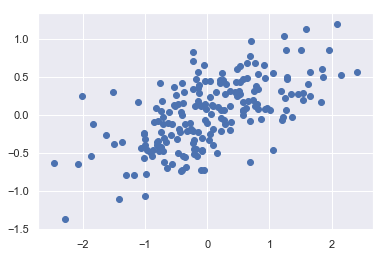

In [8]:
plt.scatter(X[:, 0], X[:, 1])
#plt.axis('equal');

In [18]:
# PCA as dimensionality reduction
# Using PCA for dimensionality reduction involves zeroing out one or more of the 
# smallest principal components, resulting in a lower-dimensional projection of the data that 
# preserves the maximal data variance.

In [10]:
pca = PCA(n_components=1)

pca.fit(X)

X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 4)
transformed shape: (200, 1)


In [10]:
# The transformed data has been reduced to a single dimension. 
# To understand the effect of this dimensionality reduction, we can perform the 
# inverse transform of this reduced data and plot it along with the original data:

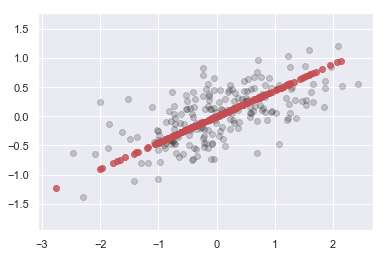

In [11]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='k')

plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')

plt.axis('equal');

The light points are the original data, while the dark points are the projected version. 

This makes clear what a PCA dimensionality reduction means: 
- the information along the least important principal axis or axes is removed, 
- leaving only the component(s) of the data with the highest variance. 

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, 

the overall relationship between the data points are mostly preserved.

## Example 2

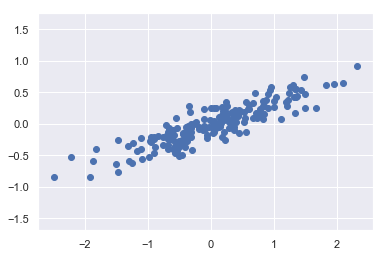

In [12]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

 it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [14]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [15]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='k',
                    shrinkA=0, 
                    shrinkB=0)
    
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [17]:
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)

0.7625315008826112 [-0.94446029 -0.32862557]
0.018477895513562572 [-0.32862557  0.94446029]


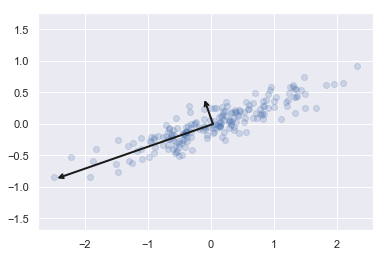

In [18]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');